# Midterm: Coding Portion

There are two parts below. Each question (marked Q1,Q2, etc.) is worth 2 points.

In [1]:
import pandas as pd
import numpy as np
import scipy.optimize
from matplotlib import pyplot as plt

## Part A: Revisiting Mean-Variance Efficient Portfolios

Suppose that $\mu$ is a column vector of the means of each asset and suppose that $\Sigma$ is the associated variance-covariance matrix. Now, suppose that we create a column vector of weights $w$ that tells us the fraction of our wealth that we invest in each asset. Then, the formulas in matrix notation for the mean and variance of the resulting portfolio are
$$
\mu_p = \mu' w
$$
and
$$
\sigma_p^2 = w' \Sigma w
$$
respectively.

I have provided code below to download data from the file `dataAssets.csv`. The code below loads a matrix of asset prices. In the matrix of prices, each row corresponds to a day. The columns correspond, (in order,) to the S&P 500 index, USD index, crude oil index, HYG index, and U.S. 10-yr Treasury index. Here I have converted prices to returns for you.

In [2]:
url = 'https://raw.githubusercontent.com/jmbejara/comp-econ-sp18/master/HW/hw-01/dataAssets.csv'
data_assets = pd.read_csv(url, parse_dates=['date'])
prices = data_assets.iloc[:,1:].values
dates = data_assets.iloc[:,0].values
rets = (prices[1:,:]/prices[:-1,:] - 1) * 100

In [3]:
rets

array([[ 0.38854818, -0.38136479, -0.37572583,  0.21891419, -0.36173324],
       [-0.35699979,  0.18400287,  0.51428571,  0.0109218 , -0.41711726],
       [-0.11528775,  0.25515864,  0.27288232, -0.08736486,  1.63667391],
       ...,
       [ 2.50830202, -0.25356182, -0.23887079,  0.54676594,  2.74901149],
       [-1.38975632,  0.0281294 , -3.89638659, -0.12727062,  0.81546637],
       [ 0.52779551, -0.57909428,  4.00906002,  0.24328082,  0.97246206]])

In HW1, we solved a constrained minimization problem of the following form:

\begin{align*}
\min_{w} \quad & w' \Sigma w \\
\text{s.t.} \quad & w' \mu = \mu_p \\
& w' \mathbb 1 = 1 
\end{align*}
where $w$ is a $k \times 1$ vector of portfolio weights corresponding to the weights put on $k$ assets, $\mu$ is an $k \times 1$ vector of expected (mean) portfolio reaturns of each asset, $\Sigma$ is the $k \times k$ variance-covariance matrix of the returns, $\mathbb 1$ is a $k \times 1$ conforming vector of ones, and $\mu_p$ is an arbitrary scalar number. In HW 1, we used `scipy.optimize.fmin_slsqp` to numerically solve this problem. I have recreated the solution below. (Note that we have $k=5$ assets.)


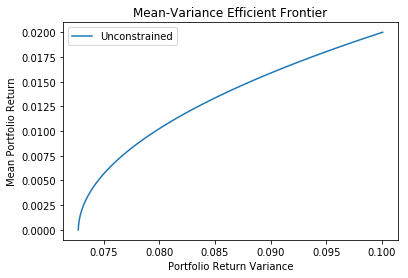

In [4]:
# MY CODE PROVIDED FOR YOU
mu = np.mean(rets, axis=0)
Sigma = np.cov(rets, rowvar=False)

N = 100
mean_grid = np.linspace(0.0, 0.02, N)
var_grid = np.zeros(N)

for i in range(N):
    mu_target = mean_grid[i]
    var_func = lambda w: w.transpose() @ Sigma @ w
    con_mean = lambda w: w @ mu - mu_target
    con_port = lambda w: w @ np.ones((5,1)) - 1
    eqcons = [con_mean, con_port]
    w0 = np.array([.2, .2, .2, .2, .2])
    wstar = scipy.optimize.fmin_slsqp(var_func, w0, eqcons=eqcons, acc=1e-09, 
                                      iprint=0)
    var_grid[i] = var_func(wstar)

plt.plot(var_grid, mean_grid, label='Unconstrained')
plt.xlabel('Portfolio Return Variance')
plt.ylabel('Mean Portfolio Return')
plt.title('Mean-Variance Efficient Frontier')
plt.legend();

This problem, as it turns out, can be solved analytically. 
The solution is given by
$$
w^* = \Sigma^{-1} 
\begin{bmatrix}
\mu & \mathbb 1
\end{bmatrix}
A^{-1}
\begin{bmatrix}
\mu_p \\
1
\end{bmatrix},
$$
where $A$ is a matrix defined by
$$
A =
\begin{bmatrix}
\mu & \mathbb 1
\end{bmatrix}^\intercal
\Sigma^{-1}
\begin{bmatrix}
\mu & \mathbb 1
\end{bmatrix}.
$$
Note that
$\begin{bmatrix}
\mu & \mathbb 1
\end{bmatrix}$
is an $N \times 2$ matrix. The two columns are stacked together.

### Q1. Analytical solution of MVE Frontier

Reconstruct the graph above of the Mean-Variance Efficient Frontier. However, this time, instead of using the numerical solved to solve for the efficient frontier, use the analytical solution I provided. For this exercise, only keep track of the resulting minimal variance. In the above numerical solution, the result is stored in `var_grid`. Your solution should be in the form of a numpy array called `var_grid_exact`. 

**Hint:** Compute the inverse of a matrix as follow:
```python
import numpy.linalg as la
a = np.array([[1,2],[3,4]])
la.inv(a)
```
gives
```
array([[-2. ,  1. ],
       [ 1.5, -0.5]])
```

Also, to make stacking rows and columns easier, consider the following Numpy functions. It doesn't matter what you choose to use---you don't even need to use these suggested function if you don't want to. I provide these for convenience.

 - `np.hstack` https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.hstack.html
 - `np.vstack` https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.vstack.html
 - `np.c_` https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
 - `np.r_` https://docs.scipy.org/doc/numpy/reference/generated/numpy.r_.html#numpy.r_
 
Also, the following starter code may be helpful:
```python
mu = np.mean(rets, axis=0)
Sigma = np.cov(rets, rowvar=False)

N = 100
mean_grid = np.linspace(0.0, 0.02, N)
var_grid_exact = np.zeros(N)

YOUR_CODE_HERE

for i in range(N):
    mu_target = mean_grid[i]
    wstar = YOUR_CODE_HERE
    var_grid_exact[i] = var_func(wstar)
    


plt.plot(var_grid_exact, mean_grid, label="Analytical Solution")
plt.xlabel('Portfolio Return Variance')
plt.ylabel('Mean Portfolio Return')
plt.title('Mean-Variance Efficient Frontier')
plt.legend();
```

### Q2. Compare Numerical and Analytical Solution

Make sure your result matches the result you got from the solver by using `np.allclose`. Use `np.allclose` to compare `var_grid` and `var_grid_exact`. The result should be `True`.

### Q3. Bounding the Portfolio Weights

Suppose we take the problem from before and add a new set of constraints. Let's add bounds on the portfolio weights such that no weight may be less than zero. We can interpret this as a constraint that disallows "short-selling." In particular, solve the problem

\begin{align*}
\min_{w} \quad & w' \Sigma w \\
\text{s.t.} \quad & w' \mu = \mu_p \\
& w' \mathbb 1 = 1 \\
& w_i \geq 0 \quad \text{ for all } i=1,..,k.
\end{align*}

Use `scipy.optimize.fmin_slsqp` again. Check the documentation for information on how to include "bound constraints." https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_slsqp.html


**Hint**: Edit the code below to incorporate the constraints:

```python
mu = np.mean(rets, axis=0)
Sigma = np.cov(rets, rowvar=False)

N = 100
mean_grid = np.linspace(0.0, .02, N)
var_grid = np.zeros(N)
var_grid_no_short = np.zeros(N)

for i in range(N):
    mu_target = mean_grid[i]
    var_func = lambda w: w.transpose() @ Sigma @ w
    con_mean = lambda w: w @ mu - mu_target
    con_port = lambda w: w @ np.ones((5,1)) - 1
    eqcons = [con_mean, con_port]
    w0 = np.array([.2, .2, .2, .2, .2])
    wstar = scipy.optimize.fmin_slsqp(var_func, w0, eqcons=eqcons, acc=1e-09, 
                                      iprint=0)
    var_grid[i] = var_func(wstar)
    wstar = scipy.optimize.fmin_slsqp(var_func, w0, 
                                      eqcons=eqcons,
                                      bounds=YOUR_CODE_HERE,
                                      acc=1e-09, 
                                      iprint=0)
    var_grid_no_short[i] = var_func(wstar)

plt.plot(var_grid, mean_grid, label='Unconstrained')
plt.plot(var_grid_no_short, mean_grid, label='No-Short Selling')
plt.xlabel('Portfolio Return Variance')
plt.ylabel('Mean Portfolio Return')
plt.title('Mean-Variance Efficient Frontier')
plt.legend()

```

## Part B. Revisiting Euro 2012

This part uses data from the UEFA European Under-21 Championship in 2012. Use the provided code below to load the data and to add two new columns: `passes_quartile` and `shoot_acc_quartile`.

In [5]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/jokecamp/FootballData/master/UEFA_European_Championship/Euro%202012/Euro%202012%20stats%20TEAM.csv', sep=',')
euro12['Shooting Accuracy'] = euro12['Shooting Accuracy'].str[:-1].astype(float)
quartiles = [0, .25, .5, .75, 1.]
# labels = ['Q1', 'Q2', 'Q3', 'Q4']
labels = None
euro12['passes_quartile'] = pd.qcut(euro12['Passes'], q=quartiles, labels=labels)
euro12['shoot_acc_quartile'] = pd.qcut(euro12['Shooting Accuracy'], q=quartiles, labels=labels)
euro12.dtypes

Team                            object
Goals                            int64
Shots on target                  int64
Shots off target                 int64
Shooting Accuracy              float64
% Goals-to-shots                object
Total shots (inc. Blocked)       int64
Hit Woodwork                     int64
Penalty goals                    int64
Penalties not scored             int64
Headed goals                     int64
Passes                           int64
Passes completed                 int64
Passing Accuracy                object
Touches                          int64
Crosses                          int64
Dribbles                         int64
Corners Taken                    int64
Tackles                          int64
Clearances                       int64
Interceptions                    int64
Clearances off line            float64
Clean Sheets                     int64
Blocks                           int64
Goals conceded                   int64
Saves made               

### Q4. Which team had the most number of "Passes"?

Just tell me the team. No need to get fancy here.

### Q5. Which team(s) had the most number of "Headed goals"?

Just tell me the team. No need to get fancy here.

### Q6. Group the data ...

Group the data by `passes_quartile`. What is the average number of `Goals` made in each quartile? **Do this using `pivot_table`.**

### Q7. Group the data ...

Group the data by `passes_quartile`. What is the average number of `Goals` made in each quartile? **Do this using `groupby`.**

### Q8. Group the data by `passes_quartile` and `shoot_acc_quartile` ...

Group the data by `passes_quartile` and `shoot_acc_quartile` and, within each group, calculate the average number of `Goals` scored. Your solution should look like the dataframe `dfsol` that I have provided in the code cell below. **Complete this exercise using `pivot_table`.**

In [6]:
# Your result should look like `dfsol` below.
from io import StringIO
sol = '''
passes_quartile,"(21.198999999999998, 33.4]","(33.4, 40.65]","(40.65, 48.35]","(48.35, 55.9]"
"(850.999, 1190.75]",5.0,1.5,,4.0
"(1190.75, 1522.0]",2.0,,5.0,4.5
"(1522.0, 1934.75]",3.5,6.0,4.0,
"(1934.75, 4317.0]",,3.0,8.0,12.0
'''
dfsol = pd.read_csv(StringIO(sol), index_col=[0])
dfsol.columns.name = 'shoot_acc_quartile'
dfsol

shoot_acc_quartile,"(21.198999999999998, 33.4]","(33.4, 40.65]","(40.65, 48.35]","(48.35, 55.9]"
passes_quartile,,,,
"(850.999, 1190.75]",5.0,1.5,NaN,4.0
"(1190.75, 1522.0]",2.0,NaN,5.0,4.5
"(1522.0, 1934.75]",3.5,6.0,4.0,NaN
"(1934.75, 4317.0]",NaN,3.0,8.0,12.0


### Q9. Group the data by `passes_quartile` and `shoot_acc_quartile` ...

Group the data by `passes_quartile` and `shoot_acc_quartile` and, within each group, calculate the average number of `Goals` scored. Your solution should look the same as the previous question. **Complete this exercise using `group_by`.**

HINT: You may need to use `unstack()`.